**Denise Dodd
DSC530 - Data Exploration and Analysis
Final**

Hypothesis: Elements of weather are all closely related and impact one another.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

df = pd.read_csv(r'C:\Users\hadle\OneDrive\Documents\530 final\Weather_Data.csv')
df.rename(columns={'Dew Point Temp_C':'Dew_Point_Temp_C', 'Rel Hum_%':'Rel_Hum', 'Wind Speed_km/h':'Wind_Speed_km_h', 'Date/Time': 'Date_Time'}, inplace=True)
df

,Date_Time,Temp_C,Dew_Point_Temp_C,Rel_Hum,Wind_Speed_km_h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Text(0, 0.5, 'Frequency')

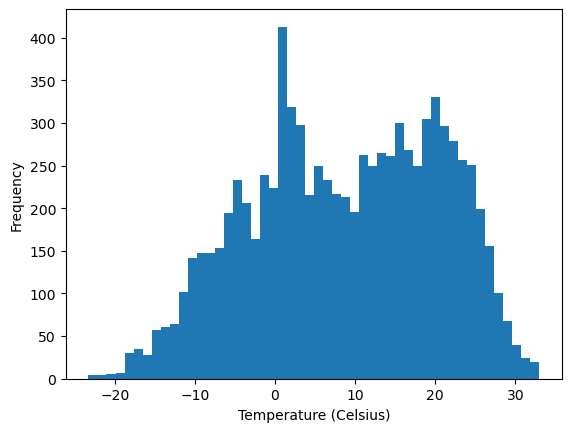

In [139]:
fig, ax = plt.subplots()
plt.hist(df.Temp_C, bins = 50)
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Frequency')

In [140]:
df.Temp_C.mean()

8.798144353369764

In [141]:
df.Temp_C.mode()

0    16.6
Name: Temp_C, dtype: float64

In [142]:
df.Temp_C.var()

136.60660363804504

In [143]:
df.Temp_C.std()

11.687882769691226

Text(0, 0.5, 'Frequency')

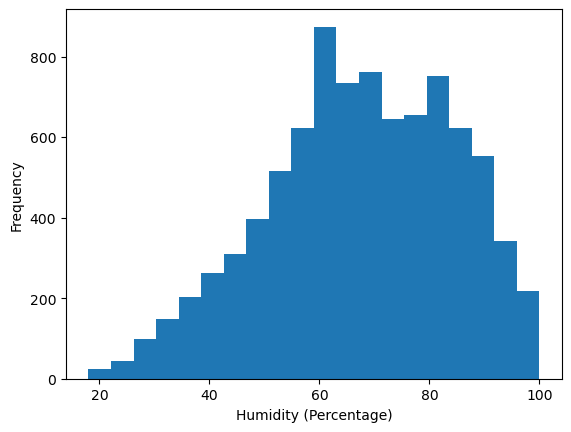

In [144]:
fig, ax = plt.subplots()
plt.hist(df.Rel_Hum, bins = 20)
ax.set_xlabel('Humidity (Percentage)')
ax.set_ylabel('Frequency')

In [145]:
df.Rel_Hum.mean()

67.43169398907104

In [146]:
df.Rel_Hum.mode()

0    68
Name: Rel_Hum, dtype: int64

In [147]:
df.Rel_Hum.var()

286.2485501984998

In [148]:
df.Rel_Hum.std()

16.918881470076556

Text(0, 0.5, 'Frequency')

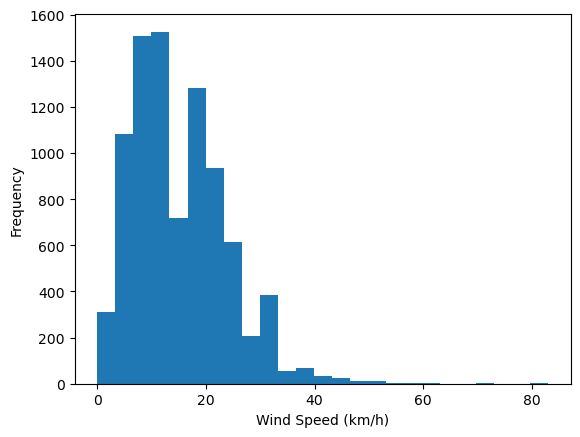

In [149]:
fig, ax = plt.subplots()
plt.hist(df.Wind_Speed_km_h, bins = 25)
ax.set_xlabel('Wind Speed (km/h)')
ax.set_ylabel('Frequency')

In [150]:
df.Wind_Speed_km_h.mean()

14.94546903460838

In [151]:
df.Wind_Speed_km_h.mode()

0    9
Name: Wind_Speed_km_h, dtype: int64

In [152]:
df.Wind_Speed_km_h.var()

75.49343956137835

In [153]:
df.Wind_Speed_km_h.std()

8.688696079468906

Text(0, 0.5, 'Frequency')

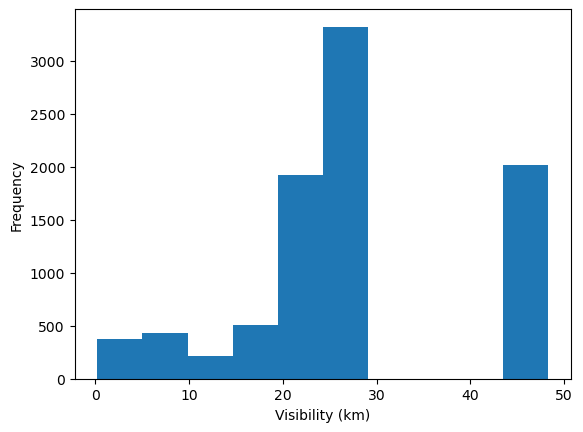

In [154]:
fig, ax = plt.subplots()
plt.hist(df.Visibility_km, bins = 10)
ax.set_xlabel('Visibility (km)')
ax.set_ylabel('Frequency')

In [155]:
df.Visibility_km.mean()

27.664446721311478

In [156]:
df.Visibility_km.mode()

0    25.0
Name: Visibility_km, dtype: float64

In [157]:
df.Visibility_km.var()

159.33225853479126

In [158]:
df.Visibility_km.std()

12.62268824517152

Text(0, 0.5, 'Frequency')

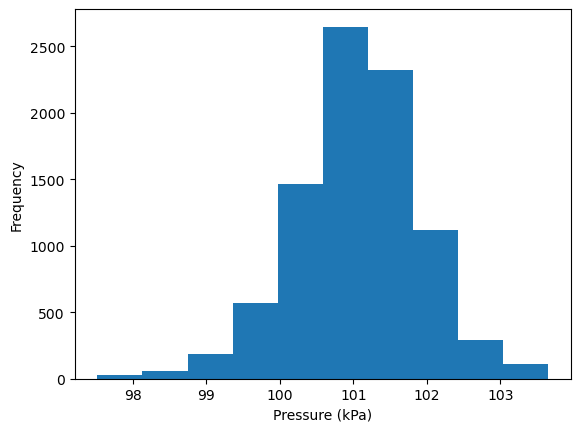

In [159]:
fig, ax = plt.subplots()
plt.hist(df.Press_kPa, bins = 10)
ax.set_xlabel('Pressure (kPa)')
ax.set_ylabel('Frequency')

In [160]:
df.Press_kPa.mean()

101.05162340619307

In [161]:
df.Press_kPa.mode()

0    101.13
Name: Press_kPa, dtype: float64

In [162]:
df.Press_kPa.var()

0.7123440111838408

In [163]:
df.Press_kPa.std()

0.8440047459486474

**Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).**

In [164]:
low_temp = df[df.Temp_C < 8.78]
high_temp = df[df.Temp_C > 8.78]
low_temp_pmf = thinkstats2.Pmf(low_temp.Rel_Hum)
high_temp_pmf = thinkstats2.Pmf(high_temp.Rel_Hum)

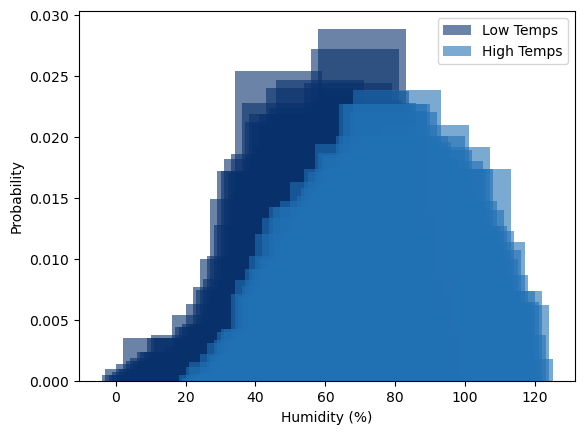

In [165]:
thinkplot.Hist(low_temp_pmf, align='right', width= 25, label = 'Low Temps' )
thinkplot.Hist(high_temp_pmf, align='left', width = 25, label = 'High Temps')
thinkplot.Config(xlabel='Humidity (%)',
ylabel='Probability')

The above PMF displays the probability of a particular humidity percentage being recorded. The data is subset into humidity records associated with temperatures above the mean temperature and below the mean temperature. It appears that lower temperatures are associated with lower percentage of humidity and higher temperatures are associated with a higher percentage of humidity. This supports the hypothesis.

**Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

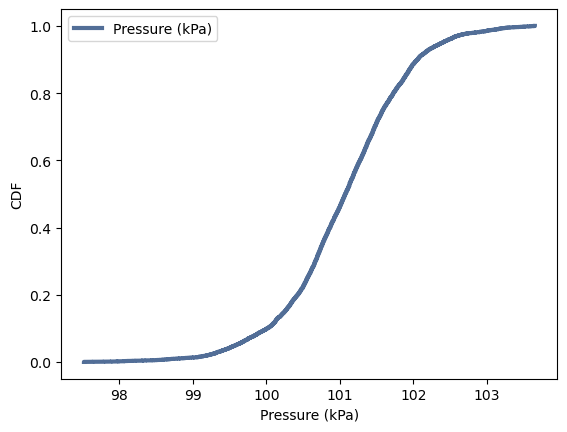

<Figure size 800x600 with 0 Axes>

In [166]:
cdf = thinkstats2.Cdf(df.Press_kPa, label='Pressure (kPa)')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Pressure (kPa)', ylabel = 'CDF')

The above CDF maps a specific pressure value to it's percentile rank (the fraction of recorded pressure that are lower than the listed pressure).

The graph portrays a normal distribution which flattens out very slightly at the tails and has a steady increasing slant in the middle.

It appears that the point where 50% of the pressures are below a given recording happens between 101 and 102 kPa. This agrees with the previously calculated summary statistics stating that the mean pressure is 101.05 kPa.

In the previous step, I separated the data into data associated with temperatures below the average temp and above the average temp. Below, I will overlay the pressure data associated with these data sets to determine if there is any variation in pressure in regards to temperature.

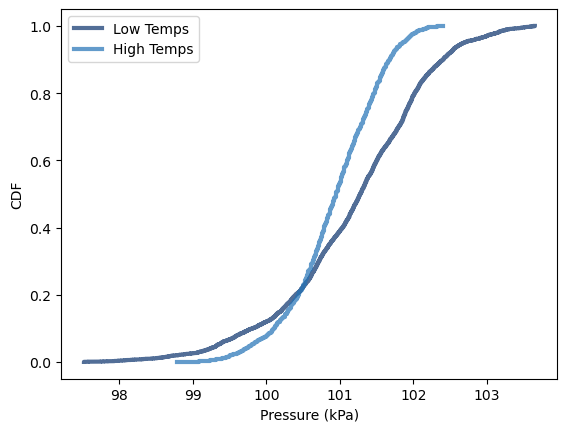

<Figure size 800x600 with 0 Axes>

In [167]:
low_temp_cdf = thinkstats2.Cdf(low_temp.Press_kPa, label='Low Temps')
high_temp_cdf = thinkstats2.Cdf(high_temp.Press_kPa, label='High Temps')
thinkplot.Cdfs([low_temp_cdf, high_temp_cdf])
thinkplot.Show(xlabel='Pressure (kPa)', ylabel='CDF')

Based on the above, it appears that temperature does play a slight role in air pressure.  The lower temperatures have a wider range of air pressure.  While the higher temps don't have as much of a range, it is overall displaying a steeper CDF which indicates a greater possibility of high air pressure with high temps.

**Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

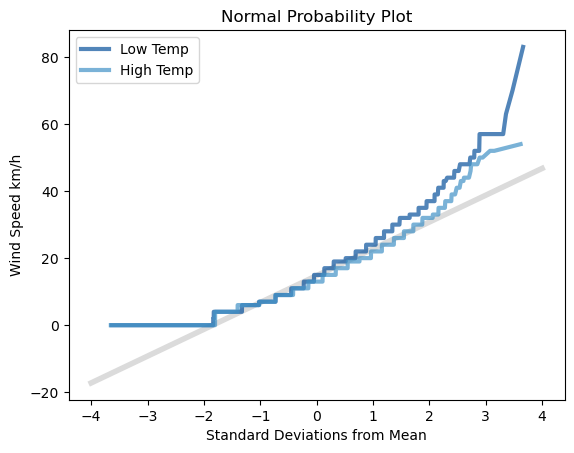

In [168]:
mean, var = thinkstats2.TrimmedMeanVar(df.Wind_Speed_km_h, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(low_temp.Wind_Speed_km_h)
thinkplot.Plot(xs, ys, label="Low Temp")

xs, ys = thinkstats2.NormalProbability(high_temp.Wind_Speed_km_h)
thinkplot.Plot(xs, ys, label="High Temp")
thinkplot.Config(
    title="Normal Probability Plot",
    xlabel="Standard Deviations from Mean",
    ylabel="Wind Speed km/h",
)

The above normal probability plot shows how many standard deviations the data in the wind speed variable is from the mean. The gray line is how we would anticipate the data to fall if this was a normal distribution with the mean at 0 and steady equidistant increases and decreases on each side.

Because the wind speed graphs do not have much overlap we can say that wind speed does not have a normal distribution. Furthermore, we have divided wind speed by speeds that occur during high temps and speeds that occur during low temps. It appears that the low temp has more of the extreme outliers. However, aside from the outliers, it appears that wind speeds during low and high temps have significant overlap indicating that wind speed is independent of temperature.

**Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

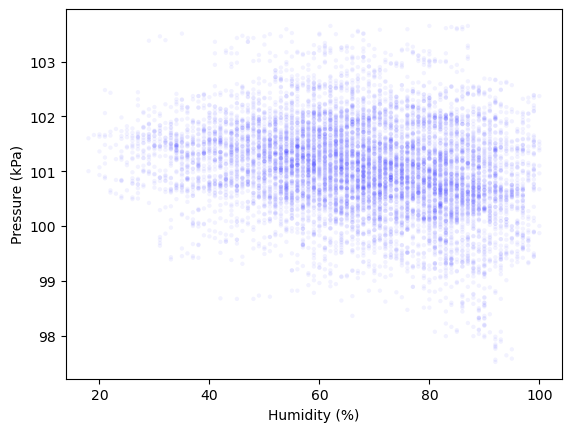

In [169]:
thinkplot.Scatter(df.Rel_Hum, df.Press_kPa, alpha = 0.05, s = 10)
thinkplot.Config(xlabel = "Humidity (%)",
ylabel = "Pressure (kPa)")

In [170]:
print("Covariance", thinkstats2.Cov(df.Rel_Hum, df.Press_kPa))
print("Pearson's Correlation", thinkstats2.Corr(df.Rel_Hum, df.Press_kPa))
print("Spearman’s Correlation", thinkstats2.SpearmanCorr(df.Rel_Hum, df.Press_kPa))

Covariance -3.3042732190669573
Pearson's Correlation -0.23142424642119042
Spearman’s Correlation -0.2408361198391913


Humidity and pressure have a negative covariance indicating that they move in opposite directions of one another. This is supported by the negative Person's and Spearman’s correlations.

Both Pearson’s and Spearman's correlations are negative indicating that when humidity is high, air pressure tends to be low and vice versa. These correlations are on a scale of -1 to 1 so a -.2 measurement is towards the middle of the scale showing a weak negative correlation. Because Spearman's correlation is slightly more negative than the Pearson's correlation, we can assume that Pearson's correlation might be skewed by outliers.

We can see this displayed in the scatter plot where outliers of high air pressure can occur regardless of humidity, but the lower outliers only occur when the humidity is high. Additionally, the more saturated areas of the scatter plot start to very slightly trend down on the right side of the graph representing high humidity and low air pressure.

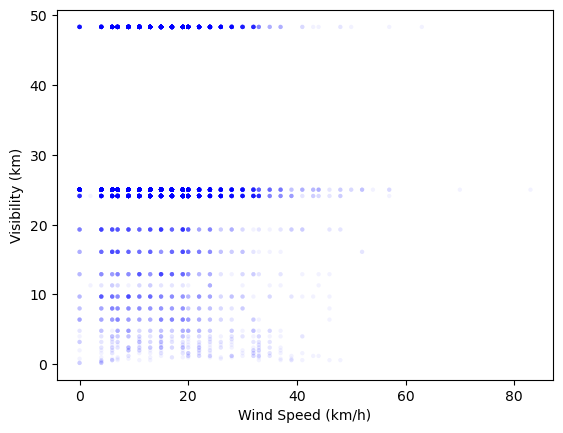

In [171]:
thinkplot.Scatter(df.Wind_Speed_km_h, df.Visibility_km, alpha = 0.05, s = 10)
thinkplot.Config(xlabel = "Wind Speed (km/h)",
ylabel = "Visibility (km)")

In [172]:
print("Covariance", thinkstats2.Cov(df.Wind_Speed_km_h, df.Visibility_km))
print("Pearson's Correlation", thinkstats2.Corr(df.Wind_Speed_km_h, df.Visibility_km))
print("Spearman’s Correlation", thinkstats2.SpearmanCorr(df.Wind_Speed_km_h, df.Visibility_km))

Covariance 0.5354474020387333
Pearson's Correlation 0.004882697258202316
Spearman’s Correlation -0.04165954261052832


Although wind speed and visibility have a positive covariance indicating that both variables move in the same direction, it is so small it's likely not significant. The strength of this relationship can be found with the Pearson's and Spearman's correlation values.

Both the Pearson's and Spearman's hover around the 0 mark and even cross over 0 with Pearson being positive and Spearman being negative. Both calculations are of such a small value, we can determine that visibility and wind speed have no impact on each other and any relationship is coincidence.

We can see this illustrated in the scatterplot which shows wind speed generally stays within a consistent 0-40 km/h regardless of visibility. Visibility is most often close to 25 or 49 km regardless of wind speed.

**Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

In [173]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [174]:
data = df.Wind_Speed_km_h, df.Visibility_km
test = CorrelationPermute(data)
pvalue = test.PValue(iters=5000)
print(pvalue)

0.6466


CorrelationPermute runs a simulation where it shuffles the wind speed and visibility variables and computes the correlations among the shuffled values. It then checks the resulting correlation against the true wind speed/visibility correlation to determine what portion of iterations returns an equivalent correlation value. After running the test through 5,000 iterations a p-value of .6366 is returned.

This large p-value indicates that any correlation between wind speed and visibility is not statistically significant and we can accept the null hypothesis that there is no connection between these variables.

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [175]:
import statsmodels.formula.api as smf

model = smf.ols('Press_kPa ~ Rel_Hum + Wind_Speed_km_h', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Press_kPa   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1082.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:47:05   Log-Likelihood:                -10006.
No. Observations:                8784   AIC:                         2.002e+04
Df Residuals:                    8781   BIC:                         2.004e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         102.5027      0.037   2753.720      0.000     102.430     102.576
Rel_Hum            -0.0133      0.000    -27.791      0.000      -0.014      -0.012
Wind_Speed_km_h    -0.0370      0.001    -39.725      0.000      -0.039      -0.035
==============================================================================
Omnibus:                       57.592   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.924
Skew:                           0.024   Prob(JB):                     2.20e-19
Kurtosis:                       3.482   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above regression analysis, I used humidity and wind speed as explanatory variables and temperature as the dependent variable of air pressure.

The R-Squared calculation shows that the exploratory variables contribute to 19.8% of the variability in air pressure.  Both of the explanatory variables have a 0 p-value and low measures of standard error.